<a href="https://colab.research.google.com/github/Seon42/data_intermediateSubmission/blob/main/%EC%A4%91%EA%B0%84%EC%A0%9C%EC%B6%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt

# google spread sheet 
import gspread as gs


# google spread sheet link
# https://docs.google.com/spreadsheets/d/1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k/edit?usp=sharing

# **Data**

In [2]:
# 2019, 2020 공연 실적 data
gsheet_name = "PerformanceData_19_20"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_perform = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 2020 중계 data
gsheet_name = "StrimingData_2020"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_strim20 = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 2021 중계 data
gsheet_name = "StrimingData_2021"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_strim21 = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 2020 공연 취소/재예매 data
gsheet_name = "TicketData_2020"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_tic20 = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 2021 공연 취소/재예매 data
gsheet_name = "TicketData_2021"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_tic21 = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)

# 동일 극장의 사회적 거리 두기 단계별 data
gsheet_name = "StepData"
gsheet_id = "1FL4nE2tqi4NXjGaFhsGchu3iu1PET4BU6JAFxcf793k"
gsheet_url_step = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheet_id, gsheet_name)


# **1. 장르별 공연 실적**

# **2. 공연 중계**

In [3]:
# 2020 중계 DF
df_2020 = pd.read_csv(gsheet_url_strim20)
df_2020

,Date,Day,Genre,Title,Price,Platform
0,2020-01-29,수,뮤지컬,앤서니 브라운 뮤지컬 비바 프렌드,무료,네이버
1,2020-02-02,일,뮤지컬,줄리 앤 폴,무료,네이버
2,2020-02-09,일,뮤지컬,여명의 눈동자,무료,네이버
3,2020-02-09,수,뮤지컬,사랑은 비를 타고,무료,네이버
4,2020-02-25,화,연극,마트료시카,무료,네이버
...,...,...,...,...,...,...
98,2020-12-26,토,뮤지컬,몬테크리스토,유료,네이버
99,2020-12-27,일,웹뮤지컬,킬러파티,유료,네이버
100,2020-12-28,월,뮤지컬,개와 고양이의 시간,유료,빵야TV
101,2020-12-28,월,뮤지컬,베르테르,유료,네이버


In [4]:
# 2021 중계 DF
df_2021 = pd.read_csv(gsheet_url_strim21)
df_2021

,Date,Day,Genre,Title,Price,Platform
0,2021-01-04,월,뮤지컬,베르테르,유료,네이버
1,2021-01-08,금,뮤지컬,젠틀맨스가이드 : 사랑과 살인편,유료,인터파크
2,2021-01-09,토,뮤지컬,젠틀맨스가이드 : 사랑과 살인편,유료,인터파크
3,2021-01-09,토,뮤지컬,젠틀맨스가이드 : 사랑과 살인편,유료,인터파크
4,2021-01-10,일,뮤지컬,젠틀맨스가이드 : 사랑과 살인편,유료,인터파크
...,...,...,...,...,...,...
249,2021-12-23,목,연극,나무의 아이,무료,네이버
250,2021-12-24,금,연극,작은 아씨들,유료,네이버
251,2021-12-25,토,연극,작은 아씨들,유료,네이버
252,2021-12-26,일,연극,작은 아씨들,유료,네이버


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, '2020-2021 Strimimng Frequency(musical)')

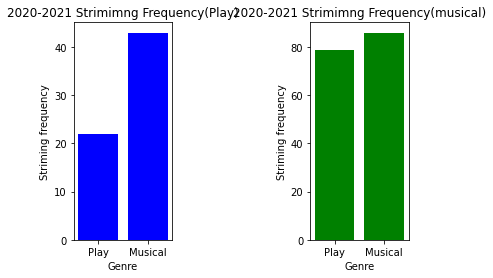

In [9]:
# 장르

play = ['연극']
musical = ['뮤지컬']

play20 = df_2020[df_2020['Genre'].isin(play)]
play21 = df_2021[df_2021['Genre'].isin(play)]
musical20 = df_2020[df_2020['Genre'].isin(musical)]
musical21 = df_2020[df_2021['Genre'].isin(musical)]

play_count = [play20.shape[0], play21.shape[0]]
musical_count = [musical20.shape[0], musical21.shape[0]]

genre = ['Play', 'Musical']

plt.subplot(1, 3, 1)
plt.bar(genre, play_count, color='blue')
plt.xlabel("Genre")
plt.ylabel("Striming frequency")
plt.title("2020-2021 Strimimng Frequency(Play)")

plt.subplot(1, 3, 3)
plt.bar(genre, musical_count, color='green')
plt.xlabel("Genre")
plt.ylabel("Striming frequency")
plt.title("2020-2021 Strimimng Frequency(musical)")


Text(0.5, 1.0, '2021 Strimimng Frequency')

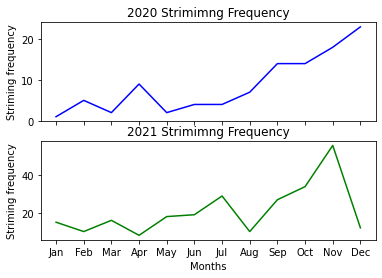

In [11]:
# 월

dateIndex = df_2020.set_index('Date')
dateIndex2 = df_2021.set_index('Date')

Jan_20 = dateIndex['2020-01':'2020-02']
Feb_20 = dateIndex['2020-02':'2020-03']
Mar_20 = dateIndex['2020-03':'2020-04']
Apr_20 = dateIndex['2020-04':'2020-05']
May_20 = dateIndex['2020-05':'2020-06']
Jun_20 = dateIndex['2020-06':'2020-07']
Jul_20 = dateIndex['2020-07':'2020-08']
Aug_20 = dateIndex['2020-08':'2020-09']
Sep_20 = dateIndex['2020-09':'2020-10']
Oct_20 = dateIndex['2020-10':'2020-11']
Nov_20 = dateIndex['2020-11':'2020-12']
Dec_20 = dateIndex['2020-12':]

Jan_21 = dateIndex2['2021-01':'2021-02']
Feb_21 = dateIndex2['2021-02':'2021-03']
Mar_21 = dateIndex2['2021-03':'2021-04']
Apr_21 = dateIndex2['2021-04':'2021-05']
May_21 = dateIndex2['2021-05':'2021-06']
Jun_21 = dateIndex2['2021-06':'2021-07']
Jul_21 = dateIndex2['2021-07':'2021-08']
Aug_21 = dateIndex2['2021-08':'2021-09']
Sep_21 = dateIndex2['2021-09':'2021-10']
Oct_21 = dateIndex2['2021-10':'2021-11']
Nov_21 = dateIndex2['2021-11':'2021-12']
Dec_21 = dateIndex2['2021-12':]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 2020 중계
count_monthData20 = [Jan_20.shape[0],Feb_20.shape[0],Mar_20.shape[0]
                         ,Apr_20.shape[0],May_20.shape[0],Jun_20.shape[0]
                         ,Jul_20.shape[0],Aug_20.shape[0],Sep_20.shape[0]
                         ,Oct_20.shape[0],Nov_20.shape[0],Dec_20.shape[0]]

# 2021 중계
count_monthData21 = [Jan_21.shape[0],Feb_21.shape[0],Mar_21.shape[0]
                         ,Apr_21.shape[0],May_21.shape[0],Jun_21.shape[0]
                         ,Jul_21.shape[0],Aug_21.shape[0],Sep_21.shape[0]
                         ,Oct_21.shape[0],Nov_21.shape[0],Dec_21.shape[0]]

ax1 = plt.subplot(2, 1, 1)
plt.plot(months, count_monthData20, color='blue')
plt.xticks(visible=False)
plt.ylabel("Striming frequency")
plt.title("2020 Strimimng Frequency")

plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(months, count_monthData21, color='green')
plt.xlabel("Months")
plt.ylabel("Striming frequency")
plt.title("2021 Strimimng Frequency")


In [ ]:
# 요일

In [ ]:
# 유/무료

In [ ]:
# 

# **3. COVID-19로 인한 공연 취소/재예매**

# **4. 동일 극장의 사회적 거리 두기 단계별 좌석 수, 예상 수익 비교**

# **5.**